# 기존

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from keras import Input
import sys,os,math,pathlib
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add

In [52]:
batch_size = 32
split_percent=0.3
rand_seed=123
shuffle_num=1000
EPOCHS=100  # add_class test
dir_path = "E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment_add_class"

### 현재 데이터 클래스 1개 추가된 상태

In [3]:
data_dir = pathlib.Path(dir_path)
image_list = list(data_dir.glob('*/*.png'))
image_size = Image.open(image_list[0]).size
img_width=image_size[0]
img_height=image_size[1]

In [4]:
print(image_list[0])

E:\##kpu_capstone_voice_data\!snowflo_real_final\saddummy@gmail.com_augment_add_class\상호한테전화해줘\sangho (136).png


In [5]:
print("{} {}".format(img_width, img_height))

260 200


### 데이터 셋 만들기 코드 (변경)
https://twinw.tistory.com/252 :: 데이터
https://bskyvision.com/1078 :: openCV 한글경로

In [3]:
# groups_folder_path = "E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/"
# categories = [
#     '굿모닝', '내일날씨어때', '상호한테전화해줘', '오늘날씨어때', '유튜브에서동빈나틀어줘', '음악추천해줘', '출근길교통상황어때'
# ]
# categories
# num_classes = len(categories)
# num_classes

7

In [36]:
# import cv2
# import numpy as np

# test_url = "E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (5).png"

# img_array = np.fromfile(test_url, np.uint8)
# img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cv2.imshow('test', img)

In [4]:
# import cv2
# import numpy as np

# X = []
# Y = []

# for idex, categorie in enumerate(categories):
#     label = [0 for i in range(num_classes)]
#     label[idex] = 1
#     image_dir = groups_folder_path + categorie + '/'
  
#     for top, dir, f in os.walk(image_dir):
#         for filename in f:
#             print(image_dir+filename)
# #             img = cv2.imread(image_dir+filename)
#             img_array = np.fromfile(image_dir+filename, np.uint8)
#             img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# #             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 없어야 원본 pycharm에서 테스트 완료

#             X.append(img/256)  # X.append(img/256)같은 경우는 픽셀은 0 ~ 255값을 가집니다. 그리고 학습을 하기엔 0~1사이의 소수가 필요하구요. 그래서 256으로 나누어 주었습니다.
#             Y.append(label)

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (238).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (239).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (98).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (99).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (100).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (101).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (102).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (103).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (104).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (105).png
E:/##kpu_capstone_voic

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (47).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (48).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (49).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (50).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (51).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (52).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (53).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (54).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (55).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (56).png
E:/##kpu_capstone_voice_data/!

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (175).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (176).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (177).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (178).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (179).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (180).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (181).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (182).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (183).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/굿모닝/morning (184).png
E:/##kpu_capstone_vo

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (26).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (27).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (28).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (29).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (30).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (31).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (32).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (33).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (34).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (111).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (112).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (113).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (114).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (115).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (116).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (117).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (118).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (119).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (201).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (202).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (203).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (204).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (205).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (206).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (207).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (208).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때/tomorrow (209).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/내일날씨어때

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (147).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (148).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (149).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (150).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (151).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (152).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (153).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (154).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (155).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (236).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (237).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (238).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (239).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (240).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (1).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (2).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (3).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (4).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangh

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (80).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (81).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (82).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (83).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (84).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (85).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (86).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (87).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho (88).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/상호한테전화해줘/sangho

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (209).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (210).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (211).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (212).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (213).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (214).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (215).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (216).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (217).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (218).png
E:/##kpu_c

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (26).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (27).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (28).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (29).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (30).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (31).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (32).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (33).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (34).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (35).png
E:/##kpu_capstone_vo

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (114).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (115).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (116).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (117).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (118).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (119).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (120).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (121).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (122).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/오늘날씨어때/today (123).png
E:/##kpu_c

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (30).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (31).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (32).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (33).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (34).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (35).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (36).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (37).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (38).png
E:/##kpu_capstone_voice_data/!snowflo

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (107).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (108).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (109).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (110).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (111).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (112).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (113).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (114).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (115).png
E:/##kpu_capstone_voice_data

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (194).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (195).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (196).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (197).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (198).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (199).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (200).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (201).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/유튜브에서동빈나틀어줘/dongbinna (202).png
E:/##kpu_capstone_voice_data

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (41).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (42).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (43).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (44).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (45).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (46).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (47).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (48).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (49).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (50).png
E:/##kpu_capstone_vo

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (126).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (127).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (128).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (129).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (130).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (131).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (132).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (133).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (134).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/음악추천해줘/music (135).png
E:/##kpu_c

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (8).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (9).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (10).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (11).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (12).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (13).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (14).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (15).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (16).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment

E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (96).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (97).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (98).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (99).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (100).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (101).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (102).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (103).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_augment/출근길교통상황어때/traffic (104).png
E:/##kpu_capstone_voice_data/!snowflo_real_final/saddummy@gmail.com_

In [6]:
X  # 체크 - 이미지

[array([[[0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         ...,
         [0.        , 0.        , 0.01953125],
         [0.        , 0.        , 0.01953125],
         [0.        , 0.        , 0.01953125]],
 
        [[0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         ...,
         [0.        , 0.        , 0.01953125],
         [0.        , 0.        , 0.01953125],
         [0.        , 0.        , 0.01953125]],
 
        [[0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.015625  ],
         ...,
         [0.07421875, 0.05078125, 0.1796875 ],
         [0.0703125 , 0.05078125, 0.1796875 ],
         [0.0703125 , 0.05078125, 0.1796875 ]],
 
        ...,
 
        [[0.        , 0.        , 0.015625  ],
         [0.        , 0.        , 0.01562

In [5]:
# # 이미지 크기 지정
# img_height = X[0].shape[0]
# img_width = X[0].shape[1]

# print(img_height, img_width)

200 260


In [8]:
Y  # 체크 - 라벨

[[1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0,

In [9]:
# # 저장
# import numpy as np
# from sklearn.model_selection import train_test_split

# X = np.array(X)
# Y = np.array(Y)
 
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
# xy = (X_train, X_test, Y_train, Y_test)
 
# np.save("./img_data.npy", xy)  # 현재 코드(.py or .ipynb) 위치와 동일 폴더에 img_data.npy 생성

In [10]:
# # 호출
# # 에러 해결: https://d-tail.tistory.com/31
# np_load_old = np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# X_train, X_test, Y_train, Y_test = np.load('./img_data.npy')

TypeError: <lambda>() got multiple values for keyword argument 'allow_pickle'

### 데이터 셋 만들기 코드 (기존)

In [57]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=split_percent,
    subset="training",
    seed=rand_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1790 files belonging to 8 classes.
Using 1253 files for training.


In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=split_percent ,
    subset="validation",
    seed=rand_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1790 files belonging to 8 classes.
Using 537 files for validation.


In [59]:
class_names = train_ds.class_names
num_classes = len(class_names)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(shuffle_num).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [60]:
class_names

['1굿모닝',
 '2내일날씨어때',
 '3상호한테전화해줘',
 '4오늘날씨어때',
 '5유튜브에서동빈나틀어줘',
 '6음악추천해줘',
 '7출근길교통상황어때',
 '8티비켜줘']

In [9]:
K = num_classes

input_tensor = Input(shape=(img_height, img_width, 3), dtype='float32', name='input')
def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x) 
    return x    
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)      
    shortcut = x
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
            shortcut = x            
    return x
 
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(4):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x

def conv4_layer(x):
    shortcut = x        
  
    for i in range(6):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x

def conv5_layer(x):
    shortcut = x    
  
    for i in range(3):     
        if(i == 0):            
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x

x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(K, activation='softmax')(x)  # dense
resnet50 = Model(input_tensor, output_tensor)
resnet50.summary()

resnet50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 130, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 130, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 7, 9, 2048)   8192        conv2d_45[0][0]                  
__________________________________________________________________________________________________
batch_normalization_46 (BatchNo (None, 7, 9, 2048)   8192        conv2d_46[0][0]                  
__________________________________________________________________________________________________
add_13 (Add)                    (None, 7, 9, 2048)   0           batch_normalization_45[0][0]     
                                                                 batch_normalization_46[0][0]     
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 7, 9, 2048)   0           add_13[0][0]                     
__________________________________________________________________________________________________
conv2d_47 

In [12]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
# xy = (X_train, X_test, Y_train, Y_test)

# EPOCHS = 150  # 3차 학습
# with tf.device('/GPU:0'):
#     history = resnet50.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=EPOCHS,
#     )

print(len(xy[0]), len(xy[1]), len(xy[2]), len(xy[3]))

1275 425 1275 425


In [ ]:
EPOCHS = 150  # 3차 학습
with tf.device('/GPU:0'):
    history = resnet50.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

In [14]:
train_ds = tf.data.Dataset.from_tensor_slices((xy[0], xy[2]))
val_ds = tf.data.Dataset.from_tensor_slices((xy[1], xy[3]))

In [ ]:
EPOCHS = 150  # 3차 학습
with tf.device('/GPU:0'):
    history = resnet50.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

### 변경사항

In [12]:
# save_format='tf' 로 저장
from keras.models import load_model
resnet50.save('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment', save_format='tf')

INFO:tensorflow:Assets written to: E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment\assets


In [13]:
# save_format='h5' 로 저장
from keras.models import load_model
resnet50.save('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment.h5')

In [15]:
# 마지막 weight 체크
resnet50.layers[-1].get_weights() 

[array([[-0.01757885, -0.04017828,  0.02126292, ..., -0.00992361,
          0.02440279, -0.04193323],
        [-0.04483274, -0.02907529, -0.03194588, ...,  0.03774488,
         -0.00178008,  0.0549255 ],
        [ 0.02572879,  0.04758789, -0.04695527, ...,  0.01152324,
         -0.03138248,  0.02605299],
        ...,
        [-0.01315743, -0.04252463,  0.02685097, ...,  0.02248451,
          0.05027541, -0.05949621],
        [ 0.02053878, -0.02275131, -0.00457344, ...,  0.0148206 ,
          0.00063182,  0.04797979],
        [-0.04338053,  0.01499127, -0.04604486, ...,  0.03702243,
         -0.03529755,  0.05290976]], dtype=float32),
 array([ 0.00156552, -0.00049413, -0.00014375,  0.00160166,  0.00075072,
         0.0014323 , -0.00171057], dtype=float32)]

학습모드에 이용

In [11]:
# tf model 로 load
from keras.models import load_model
test_tf = load_model('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment')

In [12]:
# h5 model 로 loadfrom keras.models import load_model
test_h5 = load_model('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment.h5')

In [20]:
weights_bak = resnet50.layers[-1].get_weights()  # 맨 끝만 있음
weights_bak

[array([[-0.01757885, -0.04017828,  0.02126292, ..., -0.00992361,
          0.02440279, -0.04193323],
        [-0.04483274, -0.02907529, -0.03194588, ...,  0.03774488,
         -0.00178008,  0.0549255 ],
        [ 0.02572879,  0.04758789, -0.04695527, ...,  0.01152324,
         -0.03138248,  0.02605299],
        ...,
        [-0.01315743, -0.04252463,  0.02685097, ...,  0.02248451,
          0.05027541, -0.05949621],
        [ 0.02053878, -0.02275131, -0.00457344, ...,  0.0148206 ,
          0.00063182,  0.04797979],
        [-0.04338053,  0.01499127, -0.04604486, ...,  0.03702243,
         -0.03529755,  0.05290976]], dtype=float32),
 array([ 0.00156552, -0.00049413, -0.00014375,  0.00160166,  0.00075072,
         0.0014323 , -0.00171057], dtype=float32)]

In [13]:
weights_tf = test_tf.layers[-1].get_weights()
weights_tf

[array([[-0.01757885, -0.04017828,  0.02126292, ..., -0.00992361,
          0.02440279, -0.04193323],
        [-0.04483274, -0.02907529, -0.03194588, ...,  0.03774488,
         -0.00178008,  0.0549255 ],
        [ 0.02572879,  0.04758789, -0.04695527, ...,  0.01152324,
         -0.03138248,  0.02605299],
        ...,
        [-0.01315743, -0.04252463,  0.02685097, ...,  0.02248451,
          0.05027541, -0.05949621],
        [ 0.02053878, -0.02275131, -0.00457344, ...,  0.0148206 ,
          0.00063182,  0.04797979],
        [-0.04338053,  0.01499127, -0.04604486, ...,  0.03702243,
         -0.03529755,  0.05290976]], dtype=float32),
 array([ 0.00156552, -0.00049413, -0.00014375,  0.00160166,  0.00075072,
         0.0014323 , -0.00171057], dtype=float32)]

In [14]:
weights_h5 = test_h5.layers[-1].get_weights()  # 맨 끝만 있음
weights_h5

[array([[-0.01757885, -0.04017828,  0.02126292, ..., -0.00992361,
          0.02440279, -0.04193323],
        [-0.04483274, -0.02907529, -0.03194588, ...,  0.03774488,
         -0.00178008,  0.0549255 ],
        [ 0.02572879,  0.04758789, -0.04695527, ...,  0.01152324,
         -0.03138248,  0.02605299],
        ...,
        [-0.01315743, -0.04252463,  0.02685097, ...,  0.02248451,
          0.05027541, -0.05949621],
        [ 0.02053878, -0.02275131, -0.00457344, ...,  0.0148206 ,
          0.00063182,  0.04797979],
        [-0.04338053,  0.01499127, -0.04604486, ...,  0.03702243,
         -0.03529755,  0.05290976]], dtype=float32),
 array([ 0.00156552, -0.00049413, -0.00014375,  0.00160166,  0.00075072,
         0.0014323 , -0.00171057], dtype=float32)]

### 210910 12:33

In [129]:
# load (아래서 save)
# h5 model 로 loadfrom keras.models import load_model
test_h5 = load_model('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment_mk2.h5')

In [132]:
# test
weights_bak = test_h5.layers[-1].get_weights()
weights_bak

[array([[-0.01758778, -0.0401866 ,  0.02128228, ..., -0.00992273,
          0.02440113, -0.04194269],
        [-0.04484023, -0.02908303, -0.03195988, ...,  0.03778315,
         -0.00179854,  0.0549266 ],
        [ 0.02572325,  0.04758549, -0.04696421, ...,  0.01152843,
         -0.0313897 ,  0.02605276],
        ...,
        [-0.01317754, -0.04254365,  0.02687128, ...,  0.0224937 ,
          0.05028516, -0.05951944],
        [ 0.02053918, -0.02275643, -0.00458246, ...,  0.01485057,
          0.0006123 ,  0.04798047],
        [-0.04339123,  0.01498608, -0.04606346, ...,  0.03704583,
         -0.03531209,  0.05291448]], dtype=float32),
 array([ 0.00156262, -0.0005003 , -0.0001414 ,  0.00160149,  0.00075813,
         0.00143371, -0.00171568], dtype=float32)]

In [89]:
# 기존 모델의 다른 레이어층 가중치 봉인
for layer in test_h5.layers[:-1]:
    layer.trainable = False

In [90]:
# 마지막 레이어 dense layer 확인  (추가 클래스 없음)
dense_input = test_h5.layers[-2].output

output_layer = test_h5.layers[-1]  # dense
output_layer.output.shape


TensorShape([None, 7])

In [135]:
# 마지막 레이어 dense layer 확인 (추가 클래스 있음)
K = num_classes # = len(class_names)
dense_input = test_h5.layers[-2].output

# weights_back = test_h5.layers[-1].get_weights()
# weights_back
add_output_layer = Dense(K, activation='softmax')(dense_input)  # dense
add_output_layer.shape

TensorShape([None, 8])

In [92]:
# 가중치를 이어받은 새로운 모델 생성 # 기존 모델의 다른 레이어층 가중치 봉인
# 모델 생성 dense layer 확인  (추가 클래스 없음)
resume_model = Model(test_h5.input, output_layer(dense_input))
resume_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 130, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 130, 64) 256         conv2d[0][0]                     
____________________________________________________________________________________________

__________________________________________________________________________________________________
activation_42 (Activation)      (None, 7, 9, 2048)   0           add_13[0][0]                     
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 7, 9, 512)    1049088     activation_42[0][0]              
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, 7, 9, 512)    2048        conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 7, 9, 512)    0           batch_normalization_47[0][0]     
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 7, 9, 512)    2359808     activation_43[0][0]              
__________

In [136]:
# 가중치를 이어받은 새로운 모델 생성 # 기존 모델의 다른 레이어층 가중치 봉인
# 모델 생성 dense layer 확인  (추가 클래스 있음)
resume_model = Model(test_h5.input, outputs=add_output_layer)
resume_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 130, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 130, 64) 256         conv2d[0][0]                     
____________________________________________________________________________________________

batch_normalization_42 (BatchNo (None, 13, 17, 1024) 4096        conv2d_42[0][0]                  
__________________________________________________________________________________________________
add_12 (Add)                    (None, 13, 17, 1024) 0           batch_normalization_42[0][0]     
                                                                 activation_36[0][0]              
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 13, 17, 1024) 0           add_12[0][0]                     
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 7, 9, 512)    524800      activation_39[0][0]              
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 7, 9, 512)    2048        conv2d_43[0][0]                  
__________

In [137]:
weights_new = resume_model.layers[-1].get_weights()
weights_new

[array([[-0.00465149, -0.04912828, -0.0325906 , ...,  0.04046385,
          0.02706171, -0.03021268],
        [-0.03473637,  0.01570971,  0.02562967, ..., -0.00882456,
          0.00563237,  0.05397391],
        [-0.0048218 ,  0.01402356, -0.05112049, ..., -0.00878627,
          0.00350249, -0.04994889],
        ...,
        [-0.0098937 , -0.00602801,  0.04462149, ...,  0.04186586,
          0.05058553, -0.02135953],
        [-0.01809846, -0.02978819, -0.01830974, ..., -0.03657975,
          0.03215707, -0.03848873],
        [-0.02227059, -0.01898671,  0.02100742, ..., -0.02376642,
          0.01539742,  0.0423722 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [138]:
# 이전 모델 클래스 수 - 현재 모델 클래스 수
diff = test_h5.layers[-1].get_weights()[1].shape[0] - num_classes
diff

-1

In [141]:
# 가중치 백업
weights_new[0][:, :diff] = weights_bak[0]
weights_new[1][:diff] = weights_bak[1]
weights_new

[array([[-0.01758778, -0.0401866 ,  0.02128228, ...,  0.02440113,
         -0.04194269, -0.03021268],
        [-0.04484023, -0.02908303, -0.03195988, ..., -0.00179854,
          0.0549266 ,  0.05397391],
        [ 0.02572325,  0.04758549, -0.04696421, ..., -0.0313897 ,
          0.02605276, -0.04994889],
        ...,
        [-0.01317754, -0.04254365,  0.02687128, ...,  0.05028516,
         -0.05951944, -0.02135953],
        [ 0.02053918, -0.02275643, -0.00458246, ...,  0.0006123 ,
          0.04798047, -0.03848873],
        [-0.04339123,  0.01498608, -0.04606346, ..., -0.03531209,
          0.05291448,  0.0423722 ]], dtype=float32),
 array([ 0.00156262, -0.0005003 , -0.0001414 ,  0.00160149,  0.00075813,
         0.00143371, -0.00171568,  0.        ], dtype=float32)]

In [142]:
# 가중치 봉인
for layer in resume_model.layers[:-1]:
    layer.trainable = False

In [143]:
# 컴파일
resume_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

resume_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 130, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 130, 64) 256         conv2d[0][0]                     
____________________________________________________________________________________________

batch_normalization_44 (BatchNo (None, 7, 9, 512)    2048        conv2d_44[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 7, 9, 512)    0           batch_normalization_44[0][0]     
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 7, 9, 2048)   1050624     activation_41[0][0]              
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 7, 9, 2048)   2099200     activation_39[0][0]              
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 7, 9, 2048)   8192        conv2d_45[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [147]:
resume_model.layers[-1].set_weights(weights_new)
resume_model.layers[-1].get_weights()

[array([[-0.01758778, -0.0401866 ,  0.02128228, ...,  0.02440113,
         -0.04194269, -0.03021268],
        [-0.04484023, -0.02908303, -0.03195988, ..., -0.00179854,
          0.0549266 ,  0.05397391],
        [ 0.02572325,  0.04758549, -0.04696421, ..., -0.0313897 ,
          0.02605276, -0.04994889],
        ...,
        [-0.01317754, -0.04254365,  0.02687128, ...,  0.05028516,
         -0.05951944, -0.02135953],
        [ 0.02053918, -0.02275643, -0.00458246, ...,  0.0006123 ,
          0.04798047, -0.03848873],
        [-0.04339123,  0.01498608, -0.04606346, ..., -0.03531209,
          0.05291448,  0.0423722 ]], dtype=float32),
 array([ 0.00156262, -0.0005003 , -0.0001414 ,  0.00160149,  0.00075813,
         0.00143371, -0.00171568,  0.        ], dtype=float32)]

In [125]:
# 컴파일 이후에도 기존과 동일함을 확인 (추가 클래스 x)
# 기존 모델 weight_backup (추가 클래스 o)
weights_new = resume_model.layers[-1].get_weights()
weights_new

[array([[ 0.01949392,  0.04586925,  0.04408333, ..., -0.0517591 ,
         -0.02748716, -0.04898249],
        [ 0.05007263,  0.03670108, -0.00819452, ..., -0.0059882 ,
          0.03047182,  0.0492911 ],
        [ 0.03625192, -0.03575635, -0.01577045, ..., -0.04431294,
         -0.01922972, -0.03630945],
        ...,
        [ 0.04234792,  0.02617568, -0.05250808, ...,  0.01752483,
          0.02509578,  0.00358336],
        [ 0.04856575, -0.04104618, -0.00271375, ...,  0.03562009,
         -0.03326147, -0.04448111],
        [ 0.01813437, -0.00593498,  0.0136389 , ...,  0.0186618 ,
          0.02059695,  0.0374098 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [126]:
weights_bak = test_h5.layers[-1].get_weights()
weights_bak

[array([[-0.01758778, -0.0401866 ,  0.02128228, ..., -0.00992273,
          0.02440113, -0.04194269],
        [-0.04484023, -0.02908303, -0.03195988, ...,  0.03778315,
         -0.00179854,  0.0549266 ],
        [ 0.02572325,  0.04758549, -0.04696421, ...,  0.01152843,
         -0.0313897 ,  0.02605276],
        ...,
        [-0.01317754, -0.04254365,  0.02687128, ...,  0.0224937 ,
          0.05028516, -0.05951944],
        [ 0.02053918, -0.02275643, -0.00458246, ...,  0.01485057,
          0.0006123 ,  0.04798047],
        [-0.04339123,  0.01498608, -0.04606346, ...,  0.03704583,
         -0.03531209,  0.05291448]], dtype=float32),
 array([ 0.00156262, -0.0005003 , -0.0001414 ,  0.00160149,  0.00075813,
         0.00143371, -0.00171568], dtype=float32)]

In [127]:
# weights_new[0][:, :-1] = weights_bak[0]
# weights_new[1][:-1] = weights_bak[1]
# ???????????????????????????????? 크기 확인

print("{} {} {} {}".format(weights_new[0][:, :].shape, 
                           weights_bak[0].shape,
                           weights_new[1][:].shape,
                           weights_bak[1].shape))

(2048, 8) (2048, 7) (8,) (7,)


In [128]:
print(diff)
weights_new[0][:, diff] = np.mean(weights_bak[0], axis=1)
weights_new[1][diff] = np.mean(weights_bak[1])
weights_new

-1


[array([[ 0.01949392,  0.04586925,  0.04408333, ..., -0.0517591 ,
         -0.02748716, -0.00743215],
        [ 0.05007263,  0.03670108, -0.00819452, ..., -0.0059882 ,
          0.03047182, -0.00839789],
        [ 0.03625192, -0.03575635, -0.01577045, ..., -0.04431294,
         -0.01922972,  0.00838075],
        ...,
        [ 0.04234792,  0.02617568, -0.05250808, ...,  0.01752483,
          0.02509578, -0.00424387],
        [ 0.04856575, -0.04104618, -0.00271375, ...,  0.03562009,
         -0.03326147,  0.00369561],
        [ 0.01813437, -0.00593498,  0.0136389 , ...,  0.0186618 ,
          0.02059695, -0.00038391]], dtype=float32),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00042837], dtype=float32)]

In [148]:
# 이어학습 (전이학습)
# https://codetorial.net/tensorflow/transfer_learning.html
EPOCHS = 10
history = resume_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)

Epoch 1/10
40/40 [==============================] - 38s 563ms/step - loss: 0.3343 - accuracy: 0.9483 - val_loss: 0.1419 - val_accuracy: 0.9721
Epoch 2/10
40/40 [==============================] - 9s 225ms/step - loss: 0.1389 - accuracy: 0.9706 - val_loss: 0.1983 - val_accuracy: 0.9683
Epoch 3/10
40/40 [==============================] - 9s 228ms/step - loss: 0.3930 - accuracy: 0.9687 - val_loss: 0.0682 - val_accuracy: 0.9814
Epoch 4/10
40/40 [==============================] - 9s 234ms/step - loss: 0.0947 - accuracy: 0.9787 - val_loss: 0.0798 - val_accuracy: 0.9832
Epoch 5/10
40/40 [==============================] - 9s 230ms/step - loss: 0.1039 - accuracy: 0.9719 - val_loss: 0.1732 - val_accuracy: 0.9702
Epoch 6/10
40/40 [==============================] - 9s 227ms/step - loss: 0.2595 - accuracy: 0.9625 - val_loss: 0.0690 - val_accuracy: 0.9795
Epoch 7/10
40/40 [==============================] - 9s 228ms/step - loss: 0.1089 - accuracy: 0.9807 - val_loss: 0.1243 - val_accuracy: 0.9721
Epoch

In [149]:
test_h5.layers[-1].get_weights()

[array([[-0.01758778, -0.0401866 ,  0.02128228, ..., -0.00992273,
          0.02440113, -0.04194269],
        [-0.04484023, -0.02908303, -0.03195988, ...,  0.03778315,
         -0.00179854,  0.0549266 ],
        [ 0.02572325,  0.04758549, -0.04696421, ...,  0.01152843,
         -0.0313897 ,  0.02605276],
        ...,
        [-0.01317754, -0.04254365,  0.02687128, ...,  0.0224937 ,
          0.05028516, -0.05951944],
        [ 0.02053918, -0.02275643, -0.00458246, ...,  0.01485057,
          0.0006123 ,  0.04798047],
        [-0.04339123,  0.01498608, -0.04606346, ...,  0.03704583,
         -0.03531209,  0.05291448]], dtype=float32),
 array([ 0.00156262, -0.0005003 , -0.0001414 ,  0.00160149,  0.00075813,
         0.00143371, -0.00171568], dtype=float32)]

In [150]:
resume_model.layers[-1].get_weights()

[array([[-0.01450044, -0.03656423,  0.02314706, ...,  0.02294294,
         -0.04593412, -0.01897183],
        [-0.04334139, -0.03761547, -0.0315095 , ..., -0.01010539,
          0.05081044,  0.06624503],
        [ 0.02740716,  0.0543118 , -0.06785501, ..., -0.0299793 ,
          0.02350104, -0.0502148 ],
        ...,
        [-0.02241648, -0.05700171,  0.0259869 , ...,  0.05745413,
         -0.08571246, -0.01126638],
        [ 0.00181318, -0.06370977, -0.0103215 , ..., -0.02639685,
          0.05047071, -0.01829127],
        [-0.02944381,  0.00647926, -0.05704192, ..., -0.04779259,
          0.04159585,  0.04488668]], dtype=float32),
 array([ 9.3754046e-03, -1.4954056e-03, -1.3052986e-03,  1.6418620e-03,
         1.6421090e-03, -4.3301987e-03, -8.6039985e-03, -5.1402181e-05],
       dtype=float32)]

In [151]:
# save (위에서 load)
# save_format='h5' 로 저장
from keras.models import load_model
resume_model.save('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment_mk_TV1.h5')

# test_h5
# resume_model

In [154]:
file_directory = "E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment"

from keras.preprocessing import image

for (dirpath, dirnames, filenames) in os.walk(file_directory):
    for filename in filenames:
        print("=="+ filename + "==\n")
        image_path = file_directory +'/'+ filename
        print(image_path)
        img = image.load_img(image_path, target_size=(img_height, img_width))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        
        predictions = resume_model.predict(img_array)
        print(predictions)
        score = tf.nn.softmax(predictions[0])
        print(score)
        print("새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score)))
        print("=============================================================================")


==1_call_sangho (1).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (1).png
[[2.04410644e-09 4.77801716e-22 9.99999523e-01 6.04490893e-12
  4.96793939e-09 1.06984796e-10 3.03593205e-16 4.23914855e-07]]
tf.Tensor(
[0.10289887 0.10289887 0.27970794 0.10289887 0.10289887 0.10289887
 0.10289887 0.1028989 ], shape=(8,), dtype=float32)
새로운 데이터는 3상호한테전화해줘 클래스일 확률이 27.97%입니다..
==1_call_sangho (2).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (2).png
[[4.8755213e-05 4.0535275e-10 8.6474407e-01 3.6122105e-03 1.5843513e-03
  1.5243178e-04 5.3425692e-10 1.2985815e-01]]
tf.Tensor(
[0.10506402 0.10505889 0.24945165 0.10543907 0.10522547 0.1050749
 0.10505889 0.11962707], shape=(8,), dtype=float32)
새로운 데이터는 3상호한테전화해줘 클래스일 확률이 24.95%입니다..
==1_call_sangho (3).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (3).png
[[3.4183259e-07 6.0546270e-08 1.6333

tf.Tensor(
[0.10289907 0.10289907 0.2797053  0.10289907 0.1029003  0.10289907
 0.10289907 0.10289907], shape=(8,), dtype=float32)
새로운 데이터는 3상호한테전화해줘 클래스일 확률이 27.97%입니다..
==1_call_sangho (20).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (20).png
[[9.2274563e-11 2.2840777e-22 9.9999237e-01 3.7306725e-13 7.6026186e-06
  1.5272753e-14 2.3904755e-19 1.8197955e-08]]
tf.Tensor(
[0.10289899 0.10289899 0.2797063  0.10289899 0.10289977 0.10289899
 0.10289899 0.10289899], shape=(8,), dtype=float32)
새로운 데이터는 3상호한테전화해줘 클래스일 확률이 27.97%입니다..
==1_call_sangho (21).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (21).png
[[3.5995750e-08 1.5746864e-20 9.1969377e-01 5.1106164e-11 8.0289625e-02
  1.0216244e-11 3.5376599e-14 1.6533982e-05]]
tf.Tensor(
[0.10425204 0.10425203 0.2615185  0.10425203 0.11296758 0.10425203
 0.10425203 0.10425375], shape=(8,), dtype=float32)
새로운 데이터는 3상호한테전화해줘 클래스일 확률이 26.15%입니

[[9.9999750e-01 4.2067281e-22 2.7582807e-08 1.2885966e-13 2.4884012e-06
  4.3625537e-16 4.4766526e-12 3.2752144e-08]]
tf.Tensor(
[0.2797075  0.1028989  0.1028989  0.1028989  0.10289916 0.1028989
 0.1028989  0.10289891], shape=(8,), dtype=float32)
새로운 데이터는 1굿모닝 클래스일 확률이 27.97%입니다..
==2_good_morning (21).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/2_good_morning (21).png
[[1.0000000e+00 1.0510316e-19 7.1053458e-12 1.8684954e-15 1.2970389e-08
  9.0305902e-17 6.7893824e-14 9.9528732e-11]]
tf.Tensor(
[0.27970806 0.10289886 0.10289886 0.10289886 0.10289886 0.10289886
 0.10289886 0.10289886], shape=(8,), dtype=float32)
새로운 데이터는 1굿모닝 클래스일 확률이 27.97%입니다..
==2_good_morning (22).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/2_good_morning (22).png
[[9.9999845e-01 3.0464930e-19 4.5609285e-09 3.6791750e-12 1.3955537e-06
  3.5300769e-13 1.2059581e-13 1.0495199e-07]]
tf.Tensor(
[0.2797077  0.10289888 0.10289888 0.10289888

[[1.4976648e-03 9.7069840e-14 1.2911046e-05 2.1503096e-05 1.6710109e-07
  9.9742162e-01 5.3446370e-10 1.0462097e-03]]
tf.Tensor(
[0.10309996 0.10294567 0.10294699 0.10294788 0.10294569 0.27911472
 0.10294567 0.10305343], shape=(8,), dtype=float32)
새로운 데이터는 6음악추천해줘 클래스일 확률이 27.91%입니다..
==3_recommend_music (12).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/3_recommend_music (12).png
[[5.3829964e-02 1.2202084e-08 4.2065047e-05 5.1079287e-06 2.1147739e-09
  9.4580412e-01 1.4308280e-07 3.1855336e-04]]
tf.Tensor(
[0.10957887 0.10383618 0.10384056 0.10383672 0.10383618 0.26736602
 0.10383619 0.10386927], shape=(8,), dtype=float32)
새로운 데이터는 6음악추천해줘 클래스일 확률이 26.74%입니다..
==3_recommend_music (13).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/3_recommend_music (13).png
[[1.9025259e-12 3.2987086e-15 9.5172432e-11 8.4709170e-11 4.8961706e-11
  1.0000000e+00 6.5163980e-21 3.3040980e-08]]
tf.Tensor(
[0.10289886 0.10289886 0.

  2.3023907e-07 1.6590354e-08 2.4302862e-09]]
tf.Tensor(
[0.10290346 0.2796496  0.10290346 0.10292958 0.10290346 0.10290349
 0.10290346 0.10290346], shape=(8,), dtype=float32)
새로운 데이터는 2내일날씨어때 클래스일 확률이 27.96%입니다..
==4_today_weather (6).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (6).png
[[2.3307378e-10 8.1207711e-01 9.7833660e-12 1.8791872e-01 4.8478581e-16
  1.0132585e-10 2.9320224e-06 1.1871051e-06]]
tf.Tensor(
[0.10571583 0.23813356 0.10571583 0.12757103 0.10571583 0.10571583
 0.10571613 0.10571595], shape=(8,), dtype=float32)
새로운 데이터는 2내일날씨어때 클래스일 확률이 23.81%입니다..
==4_today_weather (7).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (7).png
[[9.68152850e-11 9.99837756e-01 2.35700708e-16 1.62192504e-04
  7.37254067e-23 2.03043884e-11 3.07846992e-09 1.02993315e-10]]
tf.Tensor(
[0.1029018  0.27967072 0.1029018  0.1029185  0.1029018  0.1029018
 0.1029018  0.1029018 ], shape=(8,)

[[8.8686433e-15 4.5609876e-09 1.8034023e-13 1.0000000e+00 2.8226645e-23
  1.6273521e-14 7.6133110e-14 3.8552153e-10]]
tf.Tensor(
[0.10289886 0.10289886 0.10289886 0.27970806 0.10289886 0.10289886
 0.10289886 0.10289886], shape=(8,), dtype=float32)
새로운 데이터는 4오늘날씨어때 클래스일 확률이 27.97%입니다..
==4_today_weather (24).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (24).png
[[6.2292532e-18 3.2669853e-09 4.5532229e-14 1.0000000e+00 8.1632549e-24
  2.8749986e-17 8.3023849e-15 1.1794916e-10]]
tf.Tensor(
[0.10289886 0.10289886 0.10289886 0.27970806 0.10289886 0.10289886
 0.10289886 0.10289886], shape=(8,), dtype=float32)
새로운 데이터는 4오늘날씨어때 클래스일 확률이 27.97%입니다..
==5_tomorrow_weather (20).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (20).png
[[5.7669225e-09 9.9029070e-01 4.2264434e-13 9.7057186e-03 2.5611214e-17
  4.9201725e-14 3.5511896e-06 1.7884945e-08]]
tf.Tensor(
[0.10307395 0.2774768  0.10

[[2.2471868e-07 9.9999976e-01 1.6741226e-11 3.4398630e-11 6.9139411e-23
  1.8541410e-12 3.1265024e-08 1.1993918e-10]]
tf.Tensor(
[0.10289888 0.279708   0.10289886 0.10289886 0.10289886 0.10289886
 0.10289886 0.10289886], shape=(8,), dtype=float32)
새로운 데이터는 2내일날씨어때 클래스일 확률이 27.97%입니다..
==5_tomorrow_weather (37).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (37).png
[[5.1856275e-12 1.0000000e+00 1.4508829e-17 5.9283030e-14 2.7033356e-25
  5.7183618e-16 4.7985124e-15 2.9691844e-15]]
tf.Tensor(
[0.10289886 0.27970806 0.10289886 0.10289886 0.10289886 0.10289886
 0.10289886 0.10289886], shape=(8,), dtype=float32)
새로운 데이터는 2내일날씨어때 클래스일 확률이 27.97%입니다..
==5_tomorrow_weather (38).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (38).png
[[1.9601467e-08 9.6523005e-01 1.3058542e-11 3.4575678e-02 2.3608377e-15
  3.0450536e-14 1.9396491e-04 2.8101715e-07]]
tf.Tensor(
[0.10351145 0.2717580

[[3.5216923e-12 1.5401338e-16 1.2176174e-15 2.4544893e-12 4.7739245e-06
  2.8908122e-18 9.9999273e-01 2.5415611e-06]]
tf.Tensor(
[0.10289898 0.10289898 0.10289898 0.10289898 0.10289946 0.10289898
 0.2797064  0.10289925], shape=(8,), dtype=float32)
새로운 데이터는 7출근길교통상황어때 클래스일 확률이 27.97%입니다..
==6_working_path (14).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/6_working_path (14).png
[[4.9399512e-12 7.7248930e-15 2.0578380e-15 8.8793113e-12 1.7022553e-07
  1.9639160e-16 9.9999523e-01 4.7079716e-06]]
tf.Tensor(
[0.10289894 0.10289894 0.10289894 0.10289894 0.10289896 0.10289894
 0.27970698 0.10289942], shape=(8,), dtype=float32)
새로운 데이터는 7출근길교통상황어때 클래스일 확률이 27.97%입니다..
==6_working_path (15).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/6_working_path (15).png
[[1.0421654e-07 7.6111872e-05 2.6227745e-10 3.9407937e-06 5.9352576e-05
  1.7725524e-04 9.2705876e-01 7.2624490e-02]]
tf.Tensor(
[0.10413729 0.10414521 0.104137

tf.Tensor(
[0.10353393 0.10353393 0.10353393 0.10353394 0.2714573  0.10353515
 0.10353393 0.10733794], shape=(8,), dtype=float32)
새로운 데이터는 5유튜브에서동빈나틀어줘 클래스일 확률이 27.15%입니다..
==7_youtube_dongbinna (14).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/7_youtube_dongbinna (14).png
[[3.1086624e-19 2.6570893e-30 3.4401094e-08 9.7468894e-15 9.9999738e-01
  3.4552641e-17 4.8550373e-14 2.5749287e-06]]
tf.Tensor(
[0.1028989  0.1028989  0.10289891 0.1028989  0.2797075  0.1028989
 0.1028989  0.10289918], shape=(8,), dtype=float32)
새로운 데이터는 5유튜브에서동빈나틀어줘 클래스일 확률이 27.97%입니다..
==7_youtube_dongbinna (15).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/7_youtube_dongbinna (15).png
[[8.1559685e-21 9.3550146e-26 6.3590348e-11 7.6165906e-15 9.9996388e-01
  5.4142578e-07 1.2419989e-16 3.5503035e-05]]
tf.Tensor(
[0.10289951 0.10289951 0.10289951 0.10289951 0.27969974 0.10289955
 0.10289951 0.10290316], shape=(8,), dtype=float32)
새로운 데이터

In [67]:
weights_bak1[0].shape  # 마지막 직전
# weights_bak1[1]  # 마지막 레이어

(2048, 7)

In [23]:
# 이어학습 tf
EPOCHS = 10
with tf.device('/GPU:0'):
    history = test_tf.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

Epoch 1/10
36/36 [==============================] - 33s 652ms/step - loss: 0.3826 - accuracy: 0.8990 - val_loss: 34975.7617 - val_accuracy: 0.1463
Epoch 2/10
36/36 [==============================] - 21s 589ms/step - loss: 0.4056 - accuracy: 0.8702 - val_loss: 768.4676 - val_accuracy: 0.1341
Epoch 3/10
36/36 [==============================] - 21s 593ms/step - loss: 0.2124 - accuracy: 0.9216 - val_loss: 25.7351 - val_accuracy: 0.2236
Epoch 4/10
36/36 [==============================] - 21s 598ms/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 4.6731 - val_accuracy: 0.5915
Epoch 5/10
36/36 [==============================] - 21s 593ms/step - loss: 0.1046 - accuracy: 0.9617 - val_loss: 25.3697 - val_accuracy: 0.1768
Epoch 6/10
36/36 [==============================] - 21s 596ms/step - loss: 0.1751 - accuracy: 0.9399 - val_loss: 20.8012 - val_accuracy: 0.1687
Epoch 7/10
36/36 [==============================] - 21s 593ms/step - loss: 0.1029 - accuracy: 0.9686 - val_loss: 3.2509 - val_accurac

In [24]:
 # 이어학습 h5 --> 성공  saddummy@gmail.com_augment.h5
EPOCHS = 10
with tf.device('/GPU:0'):
    history = test_h5.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

Epoch 1/10
36/36 [==============================] - 29s 656ms/step - loss: 1.5513e-06 - accuracy: 1.0000 - val_loss: 0.2245 - val_accuracy: 0.9492
Epoch 2/10
36/36 [==============================] - 21s 590ms/step - loss: 1.5057e-06 - accuracy: 1.0000 - val_loss: 0.2252 - val_accuracy: 0.9492
Epoch 3/10
36/36 [==============================] - 21s 588ms/step - loss: 1.4606e-06 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9492
Epoch 4/10
36/36 [==============================] - 21s 592ms/step - loss: 1.4160e-06 - accuracy: 1.0000 - val_loss: 0.2267 - val_accuracy: 0.9492
Epoch 5/10
36/36 [==============================] - 21s 598ms/step - loss: 1.3750e-06 - accuracy: 1.0000 - val_loss: 0.2269 - val_accuracy: 0.9492
Epoch 6/10
36/36 [==============================] - 21s 594ms/step - loss: 1.3335e-06 - accuracy: 1.0000 - val_loss: 0.2273 - val_accuracy: 0.9492
Epoch 7/10
36/36 [==============================] - 21s 594ms/step - loss: 1.2964e-06 - accuracy: 1.0000 - val_loss: 0

### h5 모델 이어학습 추가 테스트

In [25]:
test_h5.save('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment_mk2.h5')

In [26]:
test_h5_mk2 = load_model('E:/##kpu_capstone_voice_data/##model/saddummy@gmail.com_augment_mk2.h5')

In [34]:
 # 이어학습 h5 --> 성공  saddummy@gmail.com_augment.h5, 데이터 추가 (실패)
EPOCHS = 10
with tf.device('/GPU:0'):
    history = test_h5_mk2.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

Epoch 1/10
38/38 [==============================] - 38s 868ms/step - loss: 3.2791 - accuracy: 0.2891 - val_loss: 53251018752.0000 - val_accuracy: 0.1608
Epoch 2/10
38/38 [==============================] - 22s 580ms/step - loss: 1.6814 - accuracy: 0.3639 - val_loss: 362327.9688 - val_accuracy: 0.1608
Epoch 3/10
38/38 [==============================] - 22s 585ms/step - loss: 1.3450 - accuracy: 0.4966 - val_loss: 1390.0857 - val_accuracy: 0.1902
Epoch 4/10
38/38 [==============================] - 22s 590ms/step - loss: 1.0186 - accuracy: 0.6235 - val_loss: 169.3035 - val_accuracy: 0.1235
Epoch 5/10
38/38 [==============================] - 22s 591ms/step - loss: 0.8186 - accuracy: 0.7050 - val_loss: 65.7904 - val_accuracy: 0.1235
Epoch 6/10
38/38 [==============================] - 23s 595ms/step - loss: 0.7283 - accuracy: 0.7513 - val_loss: 38.4746 - val_accuracy: 0.1176
Epoch 7/10
38/38 [==============================] - 23s 596ms/step - loss: 0.6735 - accuracy: 0.7689 - val_loss: 21.2585

기존

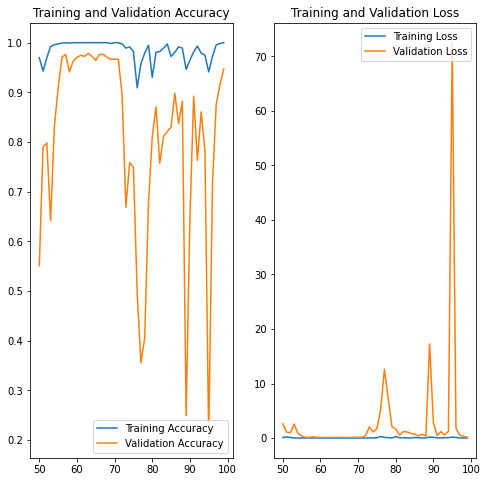

In [24]:
# 그래프
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
img = "E:/##kpu_capstone_voice_data/##same_amount_voice/augment_mix/call_sangho/denoisedsangho_bad (11).png0.png"

In [17]:
file_directory = "E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment"

from keras.preprocessing import image

for (dirpath, dirnames, filenames) in os.walk(file_directory):
    for filename in filenames:
        print("=="+ filename + "==\n")
        image_path = file_directory +'/'+ filename
        print(image_path)
        img = image.load_img(image_path, target_size=(img_height, img_width))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        
        predictions = test_h5.predict(img_array)
        print(predictions)
        score = tf.nn.softmax(predictions[0])
        print(score)
        print("새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score)))
        print("=============================================================================")


==1_call_sangho (1).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (1).png
[[9.8688800e-12 9.5769141e-19 1.0000000e+00 6.1769708e-14 8.9247826e-10
  6.8976460e-09 2.3915531e-14]]
tf.Tensor(
[0.1147015  0.1147015  0.31179097 0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
새로운 데이터는 상호한테전화해줘 클래스일 확률이 31.18%입니다..
==1_call_sangho (2).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (2).png
[[1.2590553e-07 3.9168512e-08 9.9833101e-01 2.8722646e-04 4.6853992e-04
  9.1298664e-04 1.2807108e-07]]
tf.Tensor(
[0.1147392  0.11473919 0.31137332 0.11477215 0.11479297 0.11484399
 0.1147392 ], shape=(7,), dtype=float32)
새로운 데이터는 상호한테전화해줘 클래스일 확률이 31.14%입니다..
==1_call_sangho (3).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (3).png
[[1.2087003e-08 6.1300940e-05 5.4385606e-04 9.9258256e-01 2.5913282e-04
  8.8707966e-05 6.464449

[[7.2487115e-14 8.0838765e-20 9.9999976e-01 6.9482690e-13 2.0995439e-07
  3.0243836e-13 3.4000832e-16]]
tf.Tensor(
[0.11470151 0.11470151 0.3117909  0.11470151 0.11470154 0.11470151
 0.11470151], shape=(7,), dtype=float32)
새로운 데이터는 상호한테전화해줘 클래스일 확률이 31.18%입니다..
==1_call_sangho (20).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (20).png
[[1.4840126e-13 2.5361474e-20 9.9999988e-01 2.2066630e-14 9.0551389e-08
  3.8110070e-13 8.7933377e-18]]
tf.Tensor(
[0.11470149 0.11470149 0.31179094 0.11470149 0.11470152 0.11470149
 0.11470149], shape=(7,), dtype=float32)
새로운 데이터는 상호한테전화해줘 클래스일 확률이 31.18%입니다..
==1_call_sangho (21).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/1_call_sangho (21).png
[[1.0011175e-10 8.3220516e-18 9.9896145e-01 3.1928791e-12 1.0385569e-03
  4.6209864e-10 1.3755443e-12]]
tf.Tensor(
[0.11472496 0.11472496 0.31153107 0.11472496 0.11484417 0.11472496
 0.11472496], shape=(7,), dtype=floa

[[9.9872702e-01 3.9328265e-15 8.6745125e-04 2.1556806e-12 4.0550408e-04
  2.3581712e-10 7.5593611e-09]]
tf.Tensor(
[0.3114724  0.11473025 0.11482981 0.11473025 0.11477678 0.11473025
 0.11473025], shape=(7,), dtype=float32)
새로운 데이터는 굿모닝 클래스일 확률이 31.15%입니다..
==2_good_morning (21).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/2_good_morning (21).png
[[9.9999762e-01 2.1370588e-13 4.9235467e-07 4.0032021e-14 1.8770886e-06
  2.5984366e-11 5.2188975e-11]]
tf.Tensor(
[0.3117904  0.11470156 0.11470161 0.11470156 0.11470178 0.11470156
 0.11470156], shape=(7,), dtype=float32)
새로운 데이터는 굿모닝 클래스일 확률이 31.18%입니다..
==2_good_morning (22).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/2_good_morning (22).png
[[9.9933320e-01 7.8634923e-13 1.4704902e-04 9.9888417e-11 5.1970163e-04
  2.7569111e-08 5.4736343e-10]]
tf.Tensor(
[0.31162408 0.11471657 0.11473343 0.11471657 0.1147762  0.11471657
 0.11471657], shape=(7,), dtype=float32)
새

[[7.8683388e-06 2.4342205e-11 1.9171599e-05 2.8442943e-07 3.3276328e-07
  9.9997234e-01 1.3331632e-08]]
tf.Tensor(
[0.11470304 0.11470212 0.11470433 0.11470216 0.11470217 0.3117841
 0.11470212], shape=(7,), dtype=float32)
새로운 데이터는 음악추천해줘 클래스일 확률이 31.18%입니다..
==3_recommend_music (12).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/3_recommend_music (12).png
[[6.3064719e-05 1.3962253e-07 1.5332387e-05 1.4338680e-08 5.1352061e-10
  9.9992132e-01 1.3503673e-07]]
tf.Tensor(
[0.11471051 0.11470329 0.11470503 0.11470328 0.11470328 0.31177127
 0.11470329], shape=(7,), dtype=float32)
새로운 데이터는 음악추천해줘 클래스일 확률이 31.18%입니다..
==3_recommend_music (13).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/3_recommend_music (13).png
[[4.8321053e-13 1.4191704e-12 1.2749971e-09 6.3120426e-10 1.5016070e-08
  1.0000000e+00 1.2490568e-16]]
tf.Tensor(
[0.1147015  0.1147015  0.1147015  0.1147015  0.1147015  0.31179097
 0.1147015 ], shape=(7,),

[[1.6951864e-12 9.9988282e-01 1.1375636e-14 1.1345077e-04 4.4955393e-18
  3.1630927e-06 5.8659111e-07]]
tf.Tensor(
[0.11470415 0.31176168 0.11470415 0.11471717 0.11470415 0.11470452
 0.11470422], shape=(7,), dtype=float32)
새로운 데이터는 내일날씨어때 클래스일 확률이 31.18%입니다..
==4_today_weather (6).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (6).png
[[3.9304763e-13 9.4199717e-01 1.5325080e-10 5.7843383e-02 5.9356452e-15
  3.5293906e-09 1.5945768e-04]]
tf.Tensor(
[0.11594462 0.29740945 0.11594462 0.122849   0.11594462 0.11594462
 0.11596309], shape=(7,), dtype=float32)
새로운 데이터는 내일날씨어때 클래스일 확률이 29.74%입니다..
==4_today_weather (7).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (7).png
[[4.04605657e-13 9.99948859e-01 1.63349457e-14 5.10398604e-05
  1.12033964e-20 1.07968290e-09 1.09899624e-07]]
tf.Tensor(
[0.11470266 0.3117782  0.11470266 0.11470851 0.11470266 0.11470266
 0.11470267], shape=(7,), dty

tf.Tensor(
[0.1147015  0.1147015  0.1147015  0.31179097 0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
새로운 데이터는 오늘날씨어때 클래스일 확률이 31.18%입니다..
==4_today_weather (24).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/4_today_weather (24).png
[[1.3096170e-20 6.4329440e-09 1.1215240e-12 1.0000000e+00 3.9007790e-21
  4.6142422e-16 1.7445352e-11]]
tf.Tensor(
[0.1147015  0.1147015  0.1147015  0.31179097 0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
새로운 데이터는 오늘날씨어때 클래스일 확률이 31.18%입니다..
==5_tomorrow_weather (20).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (20).png
[[7.6011463e-12 9.9839550e-01 1.1755968e-11 1.5533859e-03 1.3040714e-16
  5.0503378e-12 5.1100731e-05]]
tf.Tensor(
[0.11473773 0.31138945 0.11473773 0.11491609 0.11473773 0.11473773
 0.11474359], shape=(7,), dtype=float32)
새로운 데이터는 내일날씨어때 클래스일 확률이 31.14%입니다..
==5_tomorrow_weather (21).png==

E:/##kpu_capstone_voi

[[2.5459218e-10 1.0000000e+00 2.9256732e-11 7.1830123e-13 6.7858042e-23
  5.5371813e-10 2.4843878e-08]]
tf.Tensor(
[0.1147015  0.31179097 0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
새로운 데이터는 내일날씨어때 클래스일 확률이 31.18%입니다..
==5_tomorrow_weather (37).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (37).png
[[5.3447135e-14 1.0000000e+00 7.9054321e-16 1.3451173e-13 1.1015157e-23
  1.8430446e-13 1.6784823e-13]]
tf.Tensor(
[0.1147015  0.31179097 0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
새로운 데이터는 내일날씨어때 클래스일 확률이 31.18%입니다..
==5_tomorrow_weather (38).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/5_tomorrow_weather (38).png
[[1.1364588e-11 9.9536139e-01 1.5557071e-10 2.9417828e-03 3.2225296e-15
  3.3457965e-12 1.6969144e-03]]
tf.Tensor(
[0.11480599 0.3106308  0.11480599 0.11514422 0.11480599 0.11480599
 0.11500096], shape=(7

[[1.5139036e-16 1.1328471e-13 2.1416266e-16 8.1185728e-15 5.8356844e-09
  7.4922261e-16 1.0000000e+00]]
tf.Tensor(
[0.1147015  0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.31179097], shape=(7,), dtype=float32)
새로운 데이터는 출근길교통상황어때 클래스일 확률이 31.18%입니다..
==6_working_path (14).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/6_working_path (14).png
[[2.3171526e-16 2.9224984e-12 3.1194498e-16 2.5499695e-14 3.3106803e-10
  2.6978240e-14 1.0000000e+00]]
tf.Tensor(
[0.1147015  0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.31179097], shape=(7,), dtype=float32)
새로운 데이터는 출근길교통상황어때 클래스일 확률이 31.18%입니다..
==6_working_path (15).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/6_working_path (15).png
[[5.1261603e-12 3.3153663e-04 3.8597138e-12 3.3156866e-09 8.6114035e-08
  8.6155233e-05 9.9958223e-01]]
tf.Tensor(
[0.11471095 0.11474898 0.11471095 0.11471095 0.11471095 0.11472082
 0.31168643], shape=(7,), dtype=

[[1.3872823e-18 2.5399191e-11 9.0842188e-11 7.0778448e-08 9.9979538e-01
  1.2499896e-04 7.9537189e-05]]
tf.Tensor(
[0.11470612 0.11470612 0.11470612 0.11470614 0.31173977 0.11472047
 0.11471525], shape=(7,), dtype=float32)
새로운 데이터는 유튜브에서동빈나틀어줘 클래스일 확률이 31.17%입니다..
==7_youtube_dongbinna (14).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/7_youtube_dongbinna (14).png
[[1.9731867e-19 6.8479456e-23 1.3491556e-06 8.9953171e-14 9.9999869e-01
  5.8790792e-13 3.1345959e-08]]
tf.Tensor(
[0.11470153 0.11470153 0.11470168 0.11470153 0.31179067 0.11470153
 0.11470153], shape=(7,), dtype=float32)
새로운 데이터는 유튜브에서동빈나틀어줘 클래스일 확률이 31.18%입니다..
==7_youtube_dongbinna (15).png==

E:/##kpu_capstone_voice_data/!snowflo_real_final/validation_final_not_augment/7_youtube_dongbinna (15).png
[[1.8570807e-21 4.0665582e-20 6.9000326e-11 2.5976407e-14 9.9999034e-01
  9.6342310e-06 5.5084728e-11]]
tf.Tensor(
[0.11470173 0.11470173 0.11470173 0.11470173 0.3117886  0.11470282
 0.114

# 새로운 클래스 추가

### 모델 구조 변경

### test.layers.pop()  # dense 레이어 삭제 --> 안 됨

In [11]:
# 모델명: test, weights_bak: 기존 weight 얻기, nb_classes: 기존 class 얻기

from keras.layers import Dense
import numpy as np

# 기존 모델 weight backup
weights_bak = test_model.layers[-1].get_weights()
print(weights_bak)
nb_classes = test_model.layers[-1].output_shape[-1]
print(nb_classes)

[array([[ 0.04466043,  0.06946582, -0.08502575, ..., -0.10097951,
        -0.02636709,  0.04760658],
       [ 0.03575062,  0.04620038, -0.04354549, ..., -0.15197016,
         0.09539365,  0.00958034],
       [-0.02776275,  0.00696695,  0.06661399, ..., -0.00194581,
        -0.06024632, -0.01319455],
       ...,
       [-0.00145594,  0.05222666, -0.00341785, ..., -0.06290363,
        -0.02085103, -0.03717859],
       [-0.0664552 ,  0.02215029, -0.02771749, ...,  0.01322677,
        -0.0533746 ,  0.0528442 ],
       [ 0.02751628, -0.12613268, -0.01807615, ..., -0.02604857,
         0.00124519,  0.08939798]], dtype=float32), array([-0.00420483,  0.02200897, -0.00564838,  0.00252645, -0.00521261,
       -0.00827783, -0.00827766], dtype=float32)]
7


In [13]:
test_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 100, 130, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 100, 130, 64) 256         conv2d_53[0][0]                  
____________________________________________________________________________________________

activation_87 (Activation)      (None, 13, 17, 256)  0           batch_normalization_94[0][0]     
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 13, 17, 1024) 263168      activation_87[0][0]              
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 13, 17, 1024) 4096        conv2d_95[0][0]                  
__________________________________________________________________________________________________
add_28 (Add)                    (None, 13, 17, 1024) 0           batch_normalization_95[0][0]     
                                                                 activation_85[0][0]              
__________________________________________________________________________________________________
activation_88 (Activation)      (None, 13, 17, 1024) 0           add_28[0][0]                     
__________

In [51]:
test_model.layers.pop()  # dense 레이어 삭제 --> 안 됨

# model2= test(inputs=test.input, outputs=test.layers[-2].output)
# output_tensor = Dense(K, activation='softmax')(x)
print(test_model.input)
print(test_model.output)
print(test_model.layers[-2].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 200, 260, 3), dtype=tf.float32, name='input'), name='input', description="created by layer 'input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='global_average_pooling2d_1/Mean:0', description="created by layer 'global_average_pooling2d_1'")


In [49]:
# 총 레이어 확인
testx = test.layers
testx

In [68]:
# dense 층 재생성 확인
Dense(nb_classes+1, activation='softmax')(test.layers[-2].output)

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_12')>

In [16]:
# pop dense layer
model2 = Model(inputs=test_model.input, outputs=test_model.layers[-2].output)
model2.summary()

# print(model2.input)

# push dense layer
model3 = Model(inputs=model2.input, outputs=Dense(num_classes, activation='softmax')(test_model.layers[-2].output))
model3.summary()

# model2 = Model(inputs=model2.input, outputs=Dense(num_classes, activation='softmax').output)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 100, 130, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 100, 130, 64) 256         conv2d_53[0][0]                  
____________________________________________________________________________________________

Non-trainable params: 53,120
__________________________________________________________________________________________________
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 100, 130, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 100, 130, 64) 256       

__________________________________________________________________________________________________
batch_normalization_83 (BatchNo (None, 13, 17, 1024) 4096        conv2d_83[0][0]                  
__________________________________________________________________________________________________
add_24 (Add)                    (None, 13, 17, 1024) 0           batch_normalization_83[0][0]     
                                                                 activation_73[0][0]              
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 13, 17, 1024) 0           add_24[0][0]                     
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 13, 17, 256)  262400      activation_76[0][0]              
__________________________________________________________________________________________________
batch_norm

In [50]:
# 모델 컴파일
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# 기존 모델 weight 체크
print(weights_bak)
# 새로운 모델 weight 저장
weights_new = model3.layers[-1].get_weights()
weights_new

[array([[ 0.04466043,  0.06946582, -0.08502575, ..., -0.10097951,
        -0.02636709,  0.04760658],
       [ 0.03575062,  0.04620038, -0.04354549, ..., -0.15197016,
         0.09539365,  0.00958034],
       [-0.02776275,  0.00696695,  0.06661399, ..., -0.00194581,
        -0.06024632, -0.01319455],
       ...,
       [-0.00145594,  0.05222666, -0.00341785, ..., -0.06290363,
        -0.02085103, -0.03717859],
       [-0.0664552 ,  0.02215029, -0.02771749, ...,  0.01322677,
        -0.0533746 ,  0.0528442 ],
       [ 0.02751628, -0.12613268, -0.01807615, ..., -0.02604857,
         0.00124519,  0.08939798]], dtype=float32), array([-0.00420483,  0.02200897, -0.00564838,  0.00252645, -0.00521261,
       -0.00827783, -0.00827766], dtype=float32)]


[array([[ 0.04466043,  0.06946582, -0.08502575, ..., -0.02636709,
          0.04760658, -0.01142132],
        [ 0.03575062,  0.04620038, -0.04354549, ...,  0.09539365,
          0.00958034, -0.00042271],
        [-0.02776275,  0.00696695,  0.06661399, ..., -0.06024632,
         -0.01319455, -0.00639524],
        ...,
        [-0.00145594,  0.05222666, -0.00341785, ..., -0.02085103,
         -0.03717859, -0.00961926],
        [-0.0664552 ,  0.02215029, -0.02771749, ..., -0.0533746 ,
          0.0528442 , -0.01228867],
        [ 0.02751628, -0.12613268, -0.01807615, ...,  0.00124519,
          0.08939798, -0.01069544]], dtype=float32),
 array([-0.00420483,  0.02200897, -0.00564838,  0.00252645, -0.00521261,
        -0.00827783, -0.00827766, -0.00101227], dtype=float32)]

### 크기 확인

In [23]:
weights_new[0][:, :-1].shape

(2048, 7)

In [20]:
weights_bak[0].shape

(2048, 7)

In [52]:
bound = "====================================================================="
weights_new[0][:, :-1] = weights_bak[0]
print("{} \n {} \n {}".format(weights_new[0][:, :-1], bound, weights_bak[0]))

[[ 0.04466043  0.06946582 -0.08502575 ... -0.10097951 -0.02636709
   0.04760658]
 [ 0.03575062  0.04620038 -0.04354549 ... -0.15197016  0.09539365
   0.00958034]
 [-0.02776275  0.00696695  0.06661399 ... -0.00194581 -0.06024632
  -0.01319455]
 ...
 [-0.00145594  0.05222666 -0.00341785 ... -0.06290363 -0.02085103
  -0.03717859]
 [-0.0664552   0.02215029 -0.02771749 ...  0.01322677 -0.0533746
   0.0528442 ]
 [ 0.02751628 -0.12613268 -0.01807615 ... -0.02604857  0.00124519
   0.08939798]] 
 [[ 0.04466043  0.06946582 -0.08502575 ... -0.10097951 -0.02636709
   0.04760658]
 [ 0.03575062  0.04620038 -0.04354549 ... -0.15197016  0.09539365
   0.00958034]
 [-0.02776275  0.00696695  0.06661399 ... -0.00194581 -0.06024632
  -0.01319455]
 ...
 [-0.00145594  0.05222666 -0.00341785 ... -0.06290363 -0.02085103
  -0.03717859]
 [-0.0664552   0.02215029 -0.02771749 ...  0.01322677 -0.0533746
   0.0528442 ]
 [ 0.02751628 -0.12613268 -0.01807615 ... -0.02604857  0.00124519
   0.08939798]]


In [53]:
weights_new[1][:-1] = weights_bak[1]
print("{} \n {} \n {}".format(weights_new[1][:-1], bound, weights_bak[1]))

[-0.00420483  0.02200897 -0.00564838  0.00252645 -0.00521261 -0.00827783
 -0.00827766] 
 [-0.00420483  0.02200897 -0.00564838  0.00252645 -0.00521261 -0.00827783
 -0.00827766]


In [54]:
weights_new[0][:, -1] = np.mean(weights_bak[0], axis=1)
weights_new[1][-1] = np.mean(weights_bak[1])

In [55]:
model3.layers[-1].set_weights(weights_new)
model3.layers[-1].get_weights()

[array([[ 0.04466043,  0.06946582, -0.08502575, ..., -0.02636709,
          0.04760658, -0.01142132],
        [ 0.03575062,  0.04620038, -0.04354549, ...,  0.09539365,
          0.00958034, -0.00042271],
        [-0.02776275,  0.00696695,  0.06661399, ..., -0.06024632,
         -0.01319455, -0.00639524],
        ...,
        [-0.00145594,  0.05222666, -0.00341785, ..., -0.02085103,
         -0.03717859, -0.00961926],
        [-0.0664552 ,  0.02215029, -0.02771749, ..., -0.0533746 ,
          0.0528442 , -0.01228867],
        [ 0.02751628, -0.12613268, -0.01807615, ...,  0.00124519,
          0.08939798, -0.01069544]], dtype=float32),
 array([-0.00420483,  0.02200897, -0.00564838,  0.00252645, -0.00521261,
        -0.00827783, -0.00827766, -0.00101227], dtype=float32)]

In [56]:
EPOCHS = 10
with tf.device('/GPU:0'):
    history = model3.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
    )

Epoch 1/10
85/85 [==============================] - 98s 899ms/step - loss: 0.7852 - accuracy: 0.9279 - val_loss: 0.1175 - val_accuracy: 0.9610
Epoch 2/10
85/85 [==============================] - 50s 592ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 3/10
85/85 [==============================] - 50s 591ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9948
Epoch 4/10
85/85 [==============================] - 50s 592ms/step - loss: 8.8812e-04 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9957
Epoch 5/10
85/85 [==============================] - 50s 592ms/step - loss: 6.6020e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9965
Epoch 6/10
85/85 [==============================] - 50s 590ms/step - loss: 4.3420e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9965
Epoch 7/10
85/85 [==============================] - 50s 589ms/step - loss: 3.3970e-04 - accuracy: 1.0000 - val_loss: 0.0180 - val_

In [59]:
# 저장
model3.save('E:/##kpu_capstone_voice_data/##model/resnet50_model_9_07(denoise(o), augment(o), bad, addclass, batch=32,size=(260x200),origin_spec(0.3)-epoch=130)mk5', save_format='tf')

INFO:tensorflow:Assets written to: E:/##kpu_capstone_voice_data/##model/resnet50_model_9_07(denoise(o), augment(o), bad, addclass, batch=32,size=(260x200),origin_spec(0.3)-epoch=130)mk5\assets


In [7]:
test = load_model('E:/##kpu_capstone_voice_data/##model/resnet50_model_9_07(denoise(o), augment(o), bad, addclass, batch=32,size=(260x200),origin_spec(0.3)-epoch=130)mk5')

In [54]:
# 모델 체크
from keras.preprocessing import image
image_path = "E:/##kpu_capstone_voice_data/##same_amount_voice/#augment_bad_o(per_560)_validation/youtube_dongbinna/mung_dongbinna (1).png_denoised.png3_augment.png"
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
#print(img_array)
predictions = test.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)
print("새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score)))

[[3.6350582e-03 7.0565710e-12 3.5851303e-04 1.4540266e-05 3.7184724e-05
  4.2598704e-06 2.3420027e-08 9.9595046e-01]]
tf.Tensor(
[0.10334726 0.10297228 0.10300919 0.10297377 0.1029761  0.10297271
 0.10297228 0.27877644], shape=(8,), dtype=float32)
새로운 데이터는 youtube_dongbinna 클래스일 확률이 27.88%입니다..


### 참조
https://github.com/keras-team/keras/issues/7924

weight 계속 유지 하려면 tf로 저장

new class 추가 하려면 가장 아래 dense layer 삭제 -> 새로운 dense layer 추가